<a href="https://colab.research.google.com/github/Preranakh/DeepLearningProjects_Udemy/blob/main/TraditionalDanceClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# -*- coding: utf-8 -*-
"""Traditional Dance Classification.ipynb


# Data Entry
"""

import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [8]:
"""# Data Preprocessing"""

print(train_df.head())

print(test_df.head())



     Image         target
0   96.jpg       manipuri
1  163.jpg  bharatanatyam
2  450.jpg         odissi
3  219.jpg      kathakali
4  455.jpg         odissi
     Image
0  508.jpg
1  246.jpg
2  473.jpg
3  485.jpg
4  128.jpg


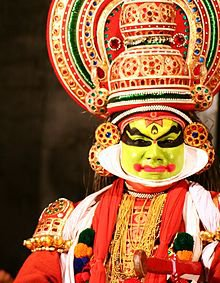

mohiniyattam     50
odissi           49
bharatanatyam    47
kathakali        47
kuchipudi        46
sattriya         45
kathak           44
manipuri         36
Name: target, dtype: int64

In [9]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('train/' + str(train_df['Image'][3]))
cv2_imshow(img)
img.shape

train_df['target'].value_counts()



In [10]:
train_df['target'].value_counts()

"""# Spliting Train and Test Data"""

from sklearn.model_selection import train_test_split
train, validate = train_test_split(train_df, test_size = 0.25, random_state = 1)

train['target'].value_counts()

validate['target'].value_counts()

"""# Importing Required Libraries to build model"""



'# Importing Required Libraries to build model'

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import activations
from tensorflow.keras import layers
import numpy as np

"""# Creating the model"""

classifier = Sequential()

classifier.add(Conv2D(32, (3,3), input_shape = (128,128,3), activation = 'relu'))
#classifier.add(BatchNormalization())
#classifier.add(layers.Activation('relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
#classifier.add(Dropout(0.5))

classifier.add(Conv2D(64, (3,3), activation = 'relu'))
#classifier.add(BatchNormalization())
#classifier.add(layers.Activation('relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.5))

classifier.add(Conv2D(128, (3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.5))

classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 8, activation = 'softmax'))

classifier.compile(loss = 'categorical_crossentropy', 
                   optimizer='adam',
                   metrics = ['accuracy'])

classifier.summary()

"""# What id Image Data Generator ?
Image data augmentation is typically only applied to the training dataset, and not to the validation or test dataset. This is different from data preparation such as image resizing and pixel scaling; they must be performed consistently across all datasets that interact with the model
"""



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 30, 30, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)      

'# What id Image Data Generator ?\nImage data augmentation is typically only applied to the training dataset, and not to the validation or test dataset. This is different from data preparation such as image resizing and pixel scaling; they must be performed consistently across all datasets that interact with the model\n'

Found 273 validated image filenames belonging to 8 classes.
Found 91 validated image filenames belonging to 8 classes.
Epoch 1/100
9/9 [==============================] - 14s 482ms/step - loss: 2.1987 - accuracy: 0.1538 - val_loss: 2.0801 - val_accuracy: 0.1319
Epoch 2/100
9/9 [==============================] - 4s 453ms/step - loss: 2.0748 - accuracy: 0.1648 - val_loss: 2.0761 - val_accuracy: 0.1319
Epoch 3/100
9/9 [==============================] - 4s 426ms/step - loss: 2.0751 - accuracy: 0.1319 - val_loss: 2.0743 - val_accuracy: 0.1429
Epoch 4/100
9/9 [==============================] - 4s 435ms/step - loss: 2.0707 - accuracy: 0.1429 - val_loss: 2.0720 - val_accuracy: 0.1868
Epoch 5/100
9/9 [==============================] - 4s 426ms/step - loss: 2.0471 - accuracy: 0.2015 - val_loss: 2.0614 - val_accuracy: 0.1429
Epoch 6/100
9/9 [==============================] - 4s 447ms/step - loss: 2.0415 - accuracy: 0.1575 - val_loss: 2.0598 - val_accuracy: 0.1648
Epoch 7/100
9/9 [=================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


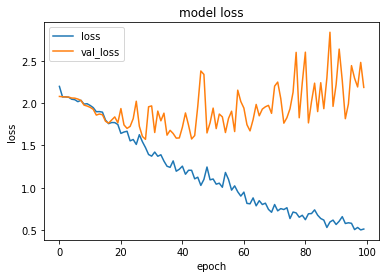

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_image_data = ImageDataGenerator(rescale = 1./255,
                                      shear_range = 0.2,
                                      zoom_range = 0.2,
                                      horizontal_flip = True,
                                      vertical_flip = True)
val_image_data = ImageDataGenerator(rescale = 1./255)

train_generator = train_image_data.flow_from_dataframe(dataframe = train,
                                                       directory = 'train',
                                                       x_col = 'Image',
                                                       y_col = 'target',
                                                       batch_size = 32,
                                                       class_mode = 'categorical',
                                                       shuffle = True,
                                                       target_size = (128,128))

test_generator = val_image_data.flow_from_dataframe(dataframe = validate,
                                                    directory = 'train',
                                                    x_col = 'Image',
                                                    y_col = 'target',
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    shuffle = True,
                                                    target_size = (128,128))

"""# Training The model"""

trained_model = classifier.fit(train_generator,
                               validation_data = test_generator,
                               epochs = 100)

"""# Saving the weights"""

classifier.evaluate_generator(generator=test_generator)
classifier.save('trained_model.h5')

"""# plotting the accuracy graph"""

# Plot training and validation loss/accuracy
import matplotlib.pyplot as plt
print(trained_model.history.keys())
# Loss
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()



